In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [2]:
df = pd.read_csv(r'C:\Users\Rich\Desktop\Adidas US Sales Datasets.csv')

In [3]:
df = df. drop(labels=[0,1], axis = 0)
df = df.reset_index(drop=True)
df.columns = df.iloc[0]
df = df.drop(labels=[0], axis=0)

In [4]:
df['Price per Unit'] = df['Price per Unit'].str.replace('$', '').str.strip()
df['Units Sold'] = df['Units Sold'].str.replace(',', '')
df['Total Sales'] = df['Total Sales'].str.replace('$', '').str.strip()
df['Operating Margin'] = df['Operating Margin'].str.replace('$', '').str.strip()
df['Operating Margin'] = df['Operating Margin'].str.replace('%', '', regex=True)
df['Total Sales'] = df['Total Sales'].str.replace(',', '', regex=True)
df['Price per Unit'] = df['Price per Unit'].str.replace(',', '', regex=True)
df[['Price per Unit','Units Sold','Total Sales','Operating Margin']]= df[['Price per Unit','Units Sold','Total Sales','Operating Margin']].astype(float)
df['Operating Profit'] = df['Operating Profit'].str.replace('$', '').str.strip()
df['Operating Profit'] = df['Operating Profit'].str.replace(',', '').str.strip()


C:\Users\Rich\AppData\Local\Temp\ipykernel_9280\2412584080.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Price per Unit'] = df['Price per Unit'].str.replace('$', '').str.strip()
C:\Users\Rich\AppData\Local\Temp\ipykernel_9280\2412584080.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Total Sales'] = df['Total Sales'].str.replace('$', '').str.strip()
C:\Users\Rich\AppData\Local\Temp\ipykernel_9280\2412584080.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Operating Margin'] = df['Operating Margin

In [5]:
df['Year']=pd.to_datetime(df['Invoice Date']).dt.year
df['Month']=pd.to_datetime(df['Invoice Date']).dt.strftime('%B')
df['Invoice Date']=pd.to_datetime(df['Invoice Date']).dt.strftime('%Y-%m-%d')

C:\Users\Rich\AppData\Local\Temp\ipykernel_9280\1092158175.py:1: UserWarning: Parsing '21/01/2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Year']=pd.to_datetime(df['Invoice Date']).dt.year
C:\Users\Rich\AppData\Local\Temp\ipykernel_9280\1092158175.py:1: UserWarning: Parsing '22/01/2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Year']=pd.to_datetime(df['Invoice Date']).dt.year
C:\Users\Rich\AppData\Local\Temp\ipykernel_9280\1092158175.py:1: UserWarning: Parsing '23/01/2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Year']=pd.to_datetime(df['Invoice Date']).dt.year
C:\Users\Rich\AppData\Local\Temp\ipykernel_9280\1092158175.py:1: UserWarning: Parsing '24/01/2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Year']=pd.to_datetime(df['Invoice 

In [6]:
df2 = df.copy()

In [7]:
df2['Region']=pd.factorize(df2.Region)[0]
df2['State']=pd.factorize(df2.State)[0]
df2['City']=pd.factorize(df2.City)[0]
df2['Product']=pd.factorize(df2.Product)[0]
df2['Retailer']=pd.factorize(df2.Retailer)[0]
df2['Year']=pd.factorize(df2.Year)[0]
df2['Month']=pd.factorize(df2.Month)[0]
df2.rename(columns = {'Sales Method':'Method'}, inplace = True)
df2['Method']=pd.factorize(df2.Method)[0]
df2 = df2.drop('Invoice Date',axis=1)

In [8]:
df2 = df2.drop('Retailer ID',axis=1)

In [9]:
df2['Units Sold'] = df2['Units Sold'].astype(int)
df2['Total Sales'] = df2['Total Sales'].astype(int)
df2['Operating Profit'] = df2['Operating Profit'].astype(int)
df2['Retailer'] = df2['Retailer'].astype(int)

In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 1 to 9648
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Retailer          9648 non-null   int32  
 1   Region            9648 non-null   int64  
 2   State             9648 non-null   int64  
 3   City              9648 non-null   int64  
 4   Product           9648 non-null   int64  
 5   Price per Unit    9648 non-null   float64
 6   Units Sold        9648 non-null   int32  
 7   Total Sales       9648 non-null   int32  
 8   Operating Profit  9648 non-null   int32  
 9   Operating Margin  9648 non-null   float64
 10  Method            9648 non-null   int64  
 11  Year              9648 non-null   int64  
 12  Month             9648 non-null   int64  
dtypes: float64(2), int32(4), int64(7)
memory usage: 829.3 KB


In [11]:
X = df2.values[:, (0,1,2,3,4,5,6,8,9,10,11,12)]
Y = df2.values[:, 7]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 45)

In [13]:
Model_dt = DecisionTreeRegressor(random_state=42)
Model_dt.fit(X_train,y_train)

DecisionTreeRegressor(random_state=42)

In [14]:
y_pred_dt = Model_dt.predict(X_test)

In [15]:
r2_dt = r2_score(y_test,y_pred_dt)
r2_dt

0.9990146941113482

In [16]:
mse_dt = mean_squared_error(y_test,y_pred_dt)
mse_dt

19945912.752331607

In [17]:
mae_dt = mean_absolute_error(y_test,y_pred_dt)
mae_dt

861.9471502590674

In [18]:
Model_rfr = RandomForestRegressor(random_state=42)
Model_rfr.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [19]:
y_pred = Model_rfr.predict(X_test)

In [20]:
mse_rf = mean_squared_error(y_test,y_pred)
mse_rf

11226256.327606479

In [21]:
r2_rf = r2_score(y_test,y_pred)
r2_rf

0.9994454354330908

In [22]:
mae_rf = mean_absolute_error(y_test,y_pred)
mae_rf

674.2733316062177

In [23]:
Model_lr = LinearRegression()
Model_lr.fit(X_train,y_train)

LinearRegression()

In [24]:
y_pred_lr = Model_lr.predict(X_test)

In [25]:
r2_lr = r2_score(y_test,y_pred_lr)
r2_lr

0.9594349742599894

In [26]:
mse_lr = mean_squared_error(y_test,y_pred_lr)
mse_lr

821172869.7911826

In [27]:
mae_lr = mean_absolute_error(y_test,y_pred_lr)
mae_lr

19331.4326314853

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
model_lor = LogisticRegression()
model_lor.fit(X_train,y_train)

c:\Users\Rich\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [30]:
y_pred_lor = model_lor.predict(X_test)

In [31]:
r2_lor = r2_score(y_test,y_pred_lor)
r2_lor

-0.7624595148412299

In [32]:
mse_lor = mean_squared_error(y_test,y_pred_lor)
mse_lor

35678122010.05077

In [33]:
mae_lor = mean_absolute_error(y_test,y_pred_lor)
mae_lor

172622.19170984457

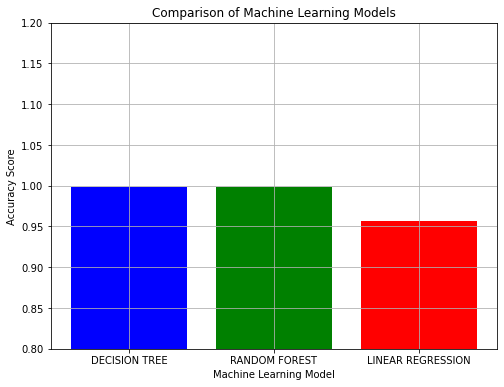

In [34]:
# Define the models to compare
models = ['DECISION TREE', 'RANDOM FOREST', 'LINEAR REGRESSION']

# Define the accuracy scores for each model
R2_scores = [0.998, 0.999, 0.957]

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(models, R2_scores, color=['blue', 'green', 'red'])
plt.xlabel('Machine Learning Model')
plt.ylabel('Accuracy Score')
plt.title('Comparison of Machine Learning Models')
plt.ylim(0.8, 1.2)
plt.grid(True)

# Display the bar chart
plt.show()

In [35]:
df2['predicted values'] = Model_rfr.predict(X)

In [36]:
df2.head(5000)

,Retailer,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Method,Year,Month,predicted values
1,0,0,0,0,0,50.0,1200,600000,300000,50.0,0,0,0,596037.50
2,0,0,0,0,1,50.0,1000,500000,150000,30.0,0,0,1,500200.00
3,0,0,0,0,2,40.0,1000,400000,140000,35.0,0,0,2,400437.50
4,0,0,0,0,3,45.0,850,382500,133875,35.0,0,0,3,381775.00
5,0,0,0,0,4,60.0,900,540000,162000,30.0,0,0,4,539362.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,2,1,13,15,1,49.0,203,9947,5570,56.0,2,1,0,9979.03
4997,2,1,13,15,2,44.0,189,8316,4906,59.0,2,1,1,8348.59
4998,2,1,13,15,3,41.0,180,7380,5092,69.0,2,1,2,7468.27
4999,2,1,13,15,4,49.0,145,7105,3908,55.0,2,1,3,7118.92


In [37]:
df2['Product'].unique()

array([0, 1, 2, 3, 4, 5], dtype=int64)

In [40]:
sales_month= df2[['Month', 'predicted values']] . groupby ('Month').sum()
sales_month = sales_month.sort_values(by="predicted values", ascending=False)
sales_month

,predicted values
Month,
9,92771216.92
8,85965686.47
7,83984002.64
11,83934232.53
4,80864264.59
5,80785621.89
3,79136485.91
6,78750814.14
10,72208406.43


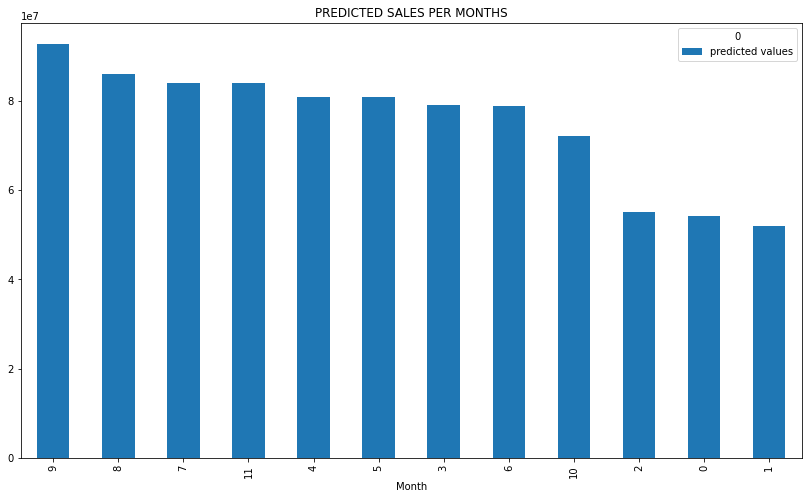

In [50]:
sales_month.plot(kind='bar', figsize=(14,8), title='PREDICTED SALES PER MONTHS')
plt.show()

In [42]:

top_products = df2[['Product','predicted values']] . groupby('Product'). sum()
top_products = top_products.sort_values(by="predicted values", ascending=False)
top_products

,predicted values
Product,
0,2.085838e+08
5,1.789673e+08
1,1.534534e+08
2,1.280482e+08
4,1.237859e+08
3,1.066915e+08


In [61]:
df['Retailer'].unique()

array(['Foot Locker', 'Walmart', 'Sports Direct', 'West Gear', "Kohl's",
       'Amazon'], dtype=object)

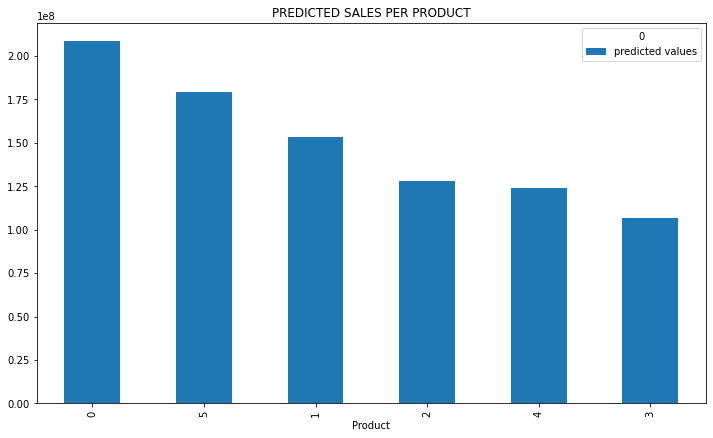

In [49]:
top_products.plot(kind='bar',figsize=(12,7), title='PREDICTED SALES PER PRODUCT')
plt.show()


In [46]:
sales_region= df2[['Region', 'predicted values']] . groupby ('Region').sum()
sales_region = sales_region.sort_values(by="predicted values", ascending=False)
sales_region

,predicted values
Region,
2,2.695018e+08
0,1.863007e+08
4,1.630104e+08
1,1.448372e+08
3,1.358800e+08


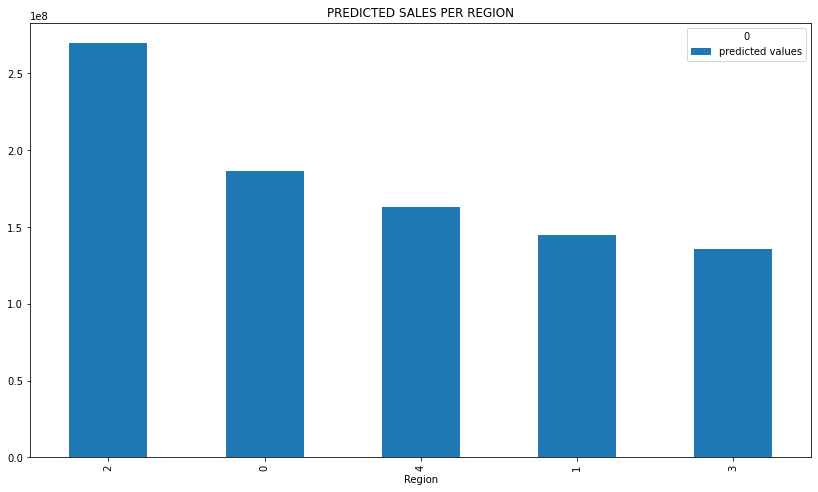

In [51]:
sales_region.plot(kind='bar', figsize=(14,8), title='PREDICTED SALES PER REGION')
plt.show()

In [48]:
top_retailers= df2[['Retailer','predicted values']].groupby('Retailer').sum()
top_retailers

,predicted values
Retailer,
0,2.200018e+08
1,7.446834e+07
2,1.828274e+08
3,2.423384e+08
4,1.021968e+08
5,7.769727e+07


<AxesSubplot:title={'center':'PREDICTED SALES PER RETAILERS'}, xlabel='Retailer'>

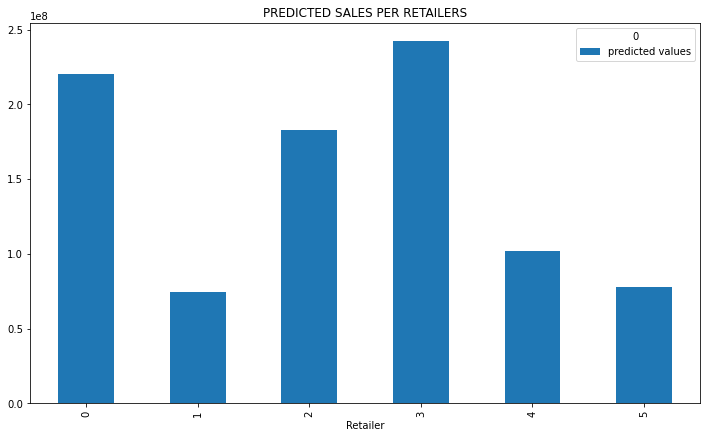

In [52]:
top_retailers.plot(kind='bar',figsize=(12,7),title='PREDICTED SALES PER RETAILERS')

In [54]:
top_salesmt= df2[['Method','predicted values']].groupby('Method').sum()

<AxesSubplot:title={'center':'Top Selling Methods On Predicted sales'}, ylabel='Method'>

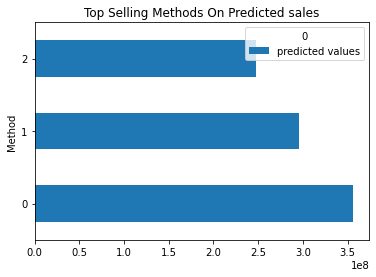

In [55]:
top_salesmt.plot(kind='barh',title='Top Selling Methods On Predicted sales')

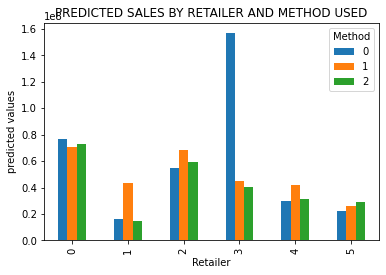

In [57]:
grouped_data = df2.groupby(['Retailer','Method'])['predicted values'].sum().reset_index()

pivot_data = grouped_data.pivot(index= 'Retailer',columns='Method',values='predicted values')
pivot_data.plot(kind='bar')
plt.xlabel('Retailer')
plt.ylabel('predicted values')
plt.title('PREDICTED SALES BY RETAILER AND METHOD USED')
plt.show()